# Biodiversity in U.S. National Parks

## North American Birds of Prey

### Data has been cleaned in `wrangling.ipynb`

In [99]:
# Importing the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns
import numpy as np

## Loading in .csv files

### `sw_birds.csv`

In [100]:
birds_df = pd.read_csv('csv_files/sw_birds.csv')
birds_df.rename(columns={'Unnamed: 0': 'prev_index'}, inplace=True)
birds_df.head()

,prev_index,park_code,park_name,family,scientific_name,common_names,conservation_status,protected,raptor
0,42081,GRCA,Grand Canyon National Park,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk
1,42082,GRCA,Grand Canyon National Park,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk
2,42083,GRCA,Grand Canyon National Park,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk
3,42084,GRCA,Grand Canyon National Park,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle
4,42085,GRCA,Grand Canyon National Park,Accipitridae,Buteo albonotatus,Zone Tailed Hawk,Least Concern,False,Hawk


### `sw_data.csv`

In [101]:
parks_df = pd.read_csv('csv_files/parks.csv')
parks_df.head()

,park_code,park_name,state,acres,latitude,longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


### `sw_extras.csv`

Extra columns may/may not need

In [102]:
extras_df = pd.read_csv('csv_files/sw_extras.csv')
extras_df.rename(columns={'Unnamed: 0': 'prev_index'}, inplace=True)
extras_df.head()

,prev_index,scientific_name,common_names,occurrence,nativeness,abundance,seasonality
0,42081,Accipiter cooperii,Cooper's Hawk,Present,Native,Common,Breeder
1,42082,Accipiter gentilis,Northern Goshawk,Present,Native,Common,Breeder
2,42083,Accipiter striatus,Sharp-Shinned Hawk,Present,Native,Common,Breeder
3,42084,Aquila chrysaetos,Golden Eagle,Present,Native,Uncommon,Breeder
4,42085,Buteo albonotatus,Zone-Tailed Hawk,Present,Native,Common,Breeder


## - `birds_df` and `extras_df` have the same index $\in$ `prev_index`

----
&nbsp;
## DataFrame merges



----
#### 1. DataFrame `sw_birds_df` from;
- `birds_df`
- `parks_df`

Aim to retain as much data as possible, using an inner merge.

In [103]:
# Replace empty strings in birds_df with a placeholder value
birds_df.loc[birds_df['raptor'] == '', 'raptor'] = '_PLACEHOLDER_'

# inner merge to retain all data
sw_birds_df = pd.merge(birds_df, parks_df, how='inner')

# Replace the placeholder value with empty strings
sw_birds_df.loc[sw_birds_df['raptor'] == '_PLACEHOLDER_', 'raptor'] = ''
print(f"\nwith shape: {sw_birds_df.shape}")


with shape: (6504, 13)


----
#### 2. DataFrame `sw_birds_all_df` from;
- `sw_birds_df`
- `extras_df`

Aim to retain as much data as possible, using an inner merge.
- replace columns in `extras_df`
- Will ultimately retain `scientific_name` and `common_names` from `birds_df`

In [104]:
extras_df = extras_df.rename(columns={'scientific_name': 'sci_loose', 'common_names': 'com_loose'})

In [105]:
# inner merge to retain all data
sw_birds_all_df = pd.merge(sw_birds_df, extras_df, how='inner')

print(f"\nwith shape: {sw_birds_all_df.shape}")


with shape: (6504, 19)


----
Delete columns

- `prev_index` in `sw_birds_df`
- `prev_index`, `sci_loose` & `com_loose` from `sw_birds_all_df`

DataFrames are merged in correct position with new indexes created

In [106]:
sw_birds_df.drop(columns=['prev_index'], axis=1, inplace=True)
sw_birds_all_df.drop(columns=['prev_index', 'sci_loose', 'com_loose'], axis=1, inplace=True)

In [107]:
print(f"\nsw_birds_df shape: {sw_birds_df.shape}")
sw_birds_df.head()


sw_birds_df shape: (6504, 12)


,park_code,park_name,family,scientific_name,common_names,conservation_status,protected,raptor,state,acres,latitude,longitude
0,GRCA,Grand Canyon National Park,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk,AZ,1217403,36.06,-112.14
1,GRCA,Grand Canyon National Park,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk,AZ,1217403,36.06,-112.14
2,GRCA,Grand Canyon National Park,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk,AZ,1217403,36.06,-112.14
3,GRCA,Grand Canyon National Park,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle,AZ,1217403,36.06,-112.14
4,GRCA,Grand Canyon National Park,Accipitridae,Buteo albonotatus,Zone Tailed Hawk,Least Concern,False,Hawk,AZ,1217403,36.06,-112.14


We have retained `sw_birds_all_df` which is the meta DataFrame for (possible) use at a later date

In [108]:
meta_df_cols = sw_birds_all_df.columns.tolist()
print(f"\nsw_birds_all_df shape: {sw_birds_all_df.shape}\n")
print(f"With columns; \n{meta_df_cols}")


sw_birds_all_df shape: (6504, 16)

With columns; 
['park_code', 'park_name', 'family', 'scientific_name', 'common_names', 'conservation_status', 'protected', 'raptor', 'state', 'acres', 'latitude', 'longitude', 'occurrence', 'nativeness', 'abundance', 'seasonality']


----
# Analysis


### `sw_birds_df` inspection



In [109]:
sw_parks_list = sw_birds_df['park_name'].unique().tolist()
print(f"We have {len(sw_parks_list)} parks: \n\n{sw_parks_list}")

We have 23 parks: 

['Grand Canyon National Park', 'Petrified Forest National Park', 'Saguaro National Park', 'Channel Islands National Park', 'Joshua Tree National Park', 'Lassen Volcanic National Park', 'Pinnacles National Park', 'Redwood National Park', 'Sequoia and Kings Canyon National Parks', 'Yosemite National Park', 'Black Canyon of the Gunnison National Park', 'Great Sand Dunes National Park and Preserve', 'Mesa Verde National Park', 'Rocky Mountain National Park', 'Great Basin National Park', 'Carlsbad Caverns National Park', 'Big Bend National Park', 'Guadalupe Mountains National Park', 'Arches National Park', 'Bryce Canyon National Park', 'Canyonlands National Park', 'Capitol Reef National Park', 'Zion National Park']


<img src="Images/Area_Baja.png"/>

In [110]:
states_list = sw_birds_df['state'].unique().tolist()
states_list = sorted(states_list)
print(f"We have {len(states_list)} states: \n\n{states_list}")

We have 7 states: 

['AZ', 'CA', 'CO', 'NM', 'NV', 'TX', 'UT']


Create separate Dataframes for each state $\in$ `states_list`.

We iterate through `states_list` to produce summary statistics of the categorical data

In [111]:
d = {}
for state in states_list:
    d[state] = pd.DataFrame(sw_birds_df[sw_birds_df['state'] == state])

for i in range(0, len(states_list)):
    print(f"\n\n{states_list[i]}:\nShape: {d[states_list[i]].shape}")
    categorical_cols = d[states_list[i]].select_dtypes(include=['object']).columns
    print(f"Summary statistics:\n{d[states_list[i]][categorical_cols].describe().transpose()}")



AZ:
Shape: (946, 12)
Summary statistics:
                    count unique                         top freq
park_code             946      3                        GRCA  456
park_name             946      3  Grand Canyon National Park  456
family                946     61                 Emberizidae   94
scientific_name       946    534          Accipiter cooperii    3
common_names          946    469                 Horned Lark    6
conservation_status   946      6               Least Concern  765
raptor                 93     11                         Owl   32
state                 946      1                          AZ  946


CA:
Shape: (2056, 12)
Summary statistics:
                    count unique                    top  freq
park_code            2056      7                   REDW   494
park_name            2056      7  Redwood National Park   494
family               2056     68              Parulidae   170
scientific_name      2056    630     Accipiter cooperii     7
common_na

California has the largest representation in `sw_birds_df`

In [112]:
# We can call DataFrames for each state using below syntax
# For Example, California:
d['CA'].head()

,park_code,park_name,family,scientific_name,common_names,conservation_status,protected,raptor,state,acres,latitude,longitude
946,CHIS,Channel Islands National Park,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk,CA,249561,34.01,-119.42
947,CHIS,Channel Islands National Park,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk,CA,249561,34.01,-119.42
948,CHIS,Channel Islands National Park,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk,CA,249561,34.01,-119.42
949,CHIS,Channel Islands National Park,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle,CA,249561,34.01,-119.42
950,CHIS,Channel Islands National Park,Accipitridae,Buteo jamaicensis,Red Tailed Hawk,Least Concern,False,Hawk,CA,249561,34.01,-119.42


#### We performed extension data wrangling on raptor species whilst neglecting non-raptors.
Need to find rows where `common_names` is 'None'. These will be removed from the dataset

In [113]:
com_name_none = sw_birds_df[sw_birds_df['common_names'] == 'None']
com_name_none_grouped = com_name_none.groupby('state').size().reset_index(name='count')

for state in states_list:
    state_rows = com_name_none_grouped[com_name_none_grouped['state'] == state]
    if len(state_rows) > 0:
        print(f"State: {state}, None Count: {state_rows['count'].values[0]}")

State: AZ, None Count: 4
State: CA, None Count: 26
State: CO, None Count: 7
State: NV, None Count: 37


In [114]:
com_name_none.head(10)

,park_code,park_name,family,scientific_name,common_names,conservation_status,protected,raptor,state,acres,latitude,longitude
295,GRCA,Grand Canyon National Park,Parulidae,Leiothlypis celata orestera,None,Least Concern,False,NaN,AZ,1217403,36.06,-112.14
401,GRCA,Grand Canyon National Park,Vireonidae,Vireo olivaceus olivaceus,None,Least Concern,False,NaN,AZ,1217403,36.06,-112.14
404,GRCA,Grand Canyon National Park,Vireonidae,Vireo plumbeus plumbeus,None,Least Concern,False,NaN,AZ,1217403,36.06,-112.14
918,SAGU,Saguaro National Park,Picidae,Colaptes auratus cafer,None,Least Concern,False,NaN,AZ,91440,32.25,-110.50
1378,JOTR,Joshua Tree National Park,Scolopacidae,Tringa semipalmata,None,Least Concern,False,NaN,CA,789745,33.79,-115.90
2019,REDW,Redwood National Park,No Data,Erolia ptilochemis,None,Least Concern,False,NaN,CA,112512,41.30,-124.00
2021,REDW,Redwood National Park,Odontophoridae,Lophortyx pictus,None,Least Concern,False,NaN,CA,112512,41.30,-124.00
2058,REDW,Redwood National Park,Anatidae,Branta nigricans,None,Least Concern,False,NaN,CA,112512,41.30,-124.00
2071,REDW,Redwood National Park,Anatidae,Mareca americana,None,Least Concern,False,NaN,CA,112512,41.30,-124.00
2101,REDW,Redwood National Park,Alcidae,Brachyramphus marmoratus maroratum,None,Least Concern,False,NaN,CA,112512,41.30,-124.00


In [115]:
sw_birds_df = sw_birds_df[sw_birds_df['common_names'] != 'None'].reset_index()
sw_birds_df.drop(columns=['index'], axis=1, inplace=True)
count = sw_birds_df[sw_birds_df['common_names'] == 'None']
count

,park_code,park_name,family,scientific_name,common_names,conservation_status,protected,raptor,state,acres,latitude,longitude


### Create a new boolean column `is_protected` to include any species with `conservation_status` $\neq$ 'Least Concern'

In [116]:
sw_birds_df['is_protected'] = sw_birds_df.conservation_status != 'Least Concern'

In [117]:
parks_pro_counts = sw_birds_df.groupby(['state', 'park_name', 'is_protected'])\
                    .common_names.nunique()\
                    .reset_index()\
                    .pivot(columns='is_protected',
                            index=['state', 'park_name'],
                            values='common_names')\
                            .reset_index()
parks_pro_counts.columns = ['state', 'park_name', 'not_protected', 'protected']

percentage = round(parks_pro_counts.protected / (parks_pro_counts.protected + parks_pro_counts.not_protected) * 100, 2)
parks_pro_counts['%age_protected'] = percentage

# Split 'park_name' in this dataframe to remove 'National Park'
parks_pro_counts['park_name'] = parks_pro_counts['park_name'].apply(lambda x: x[:-13] if x.endswith(" National Park") else x)
# lambda function doesn't apply to indices [8] or [11] so,
parks_pro_counts.at[8, 'park_name'] = 'Sequoia & Kings Canyon'
parks_pro_counts.at[11, 'park_name'] = 'Great Sand Dunes'

parks_pro_counts

,state,park_name,not_protected,protected,%age_protected
0,AZ,Grand Canyon,318,72,18.46
1,AZ,Petrified Forest,190,54,22.13
2,AZ,Saguaro,191,54,22.04
3,CA,Channel Islands,289,68,19.05
4,CA,Joshua Tree,236,64,21.33
5,CA,Lassen Volcanic,187,55,22.73
6,CA,Pinnacles,130,39,23.08
7,CA,Redwood,370,78,17.41
8,CA,Sequoia & Kings Canyon,170,50,22.73
9,CA,Yosemite,217,53,19.63


We plot an interation of the above DataFrame by `state` for those states with more than two National Parks

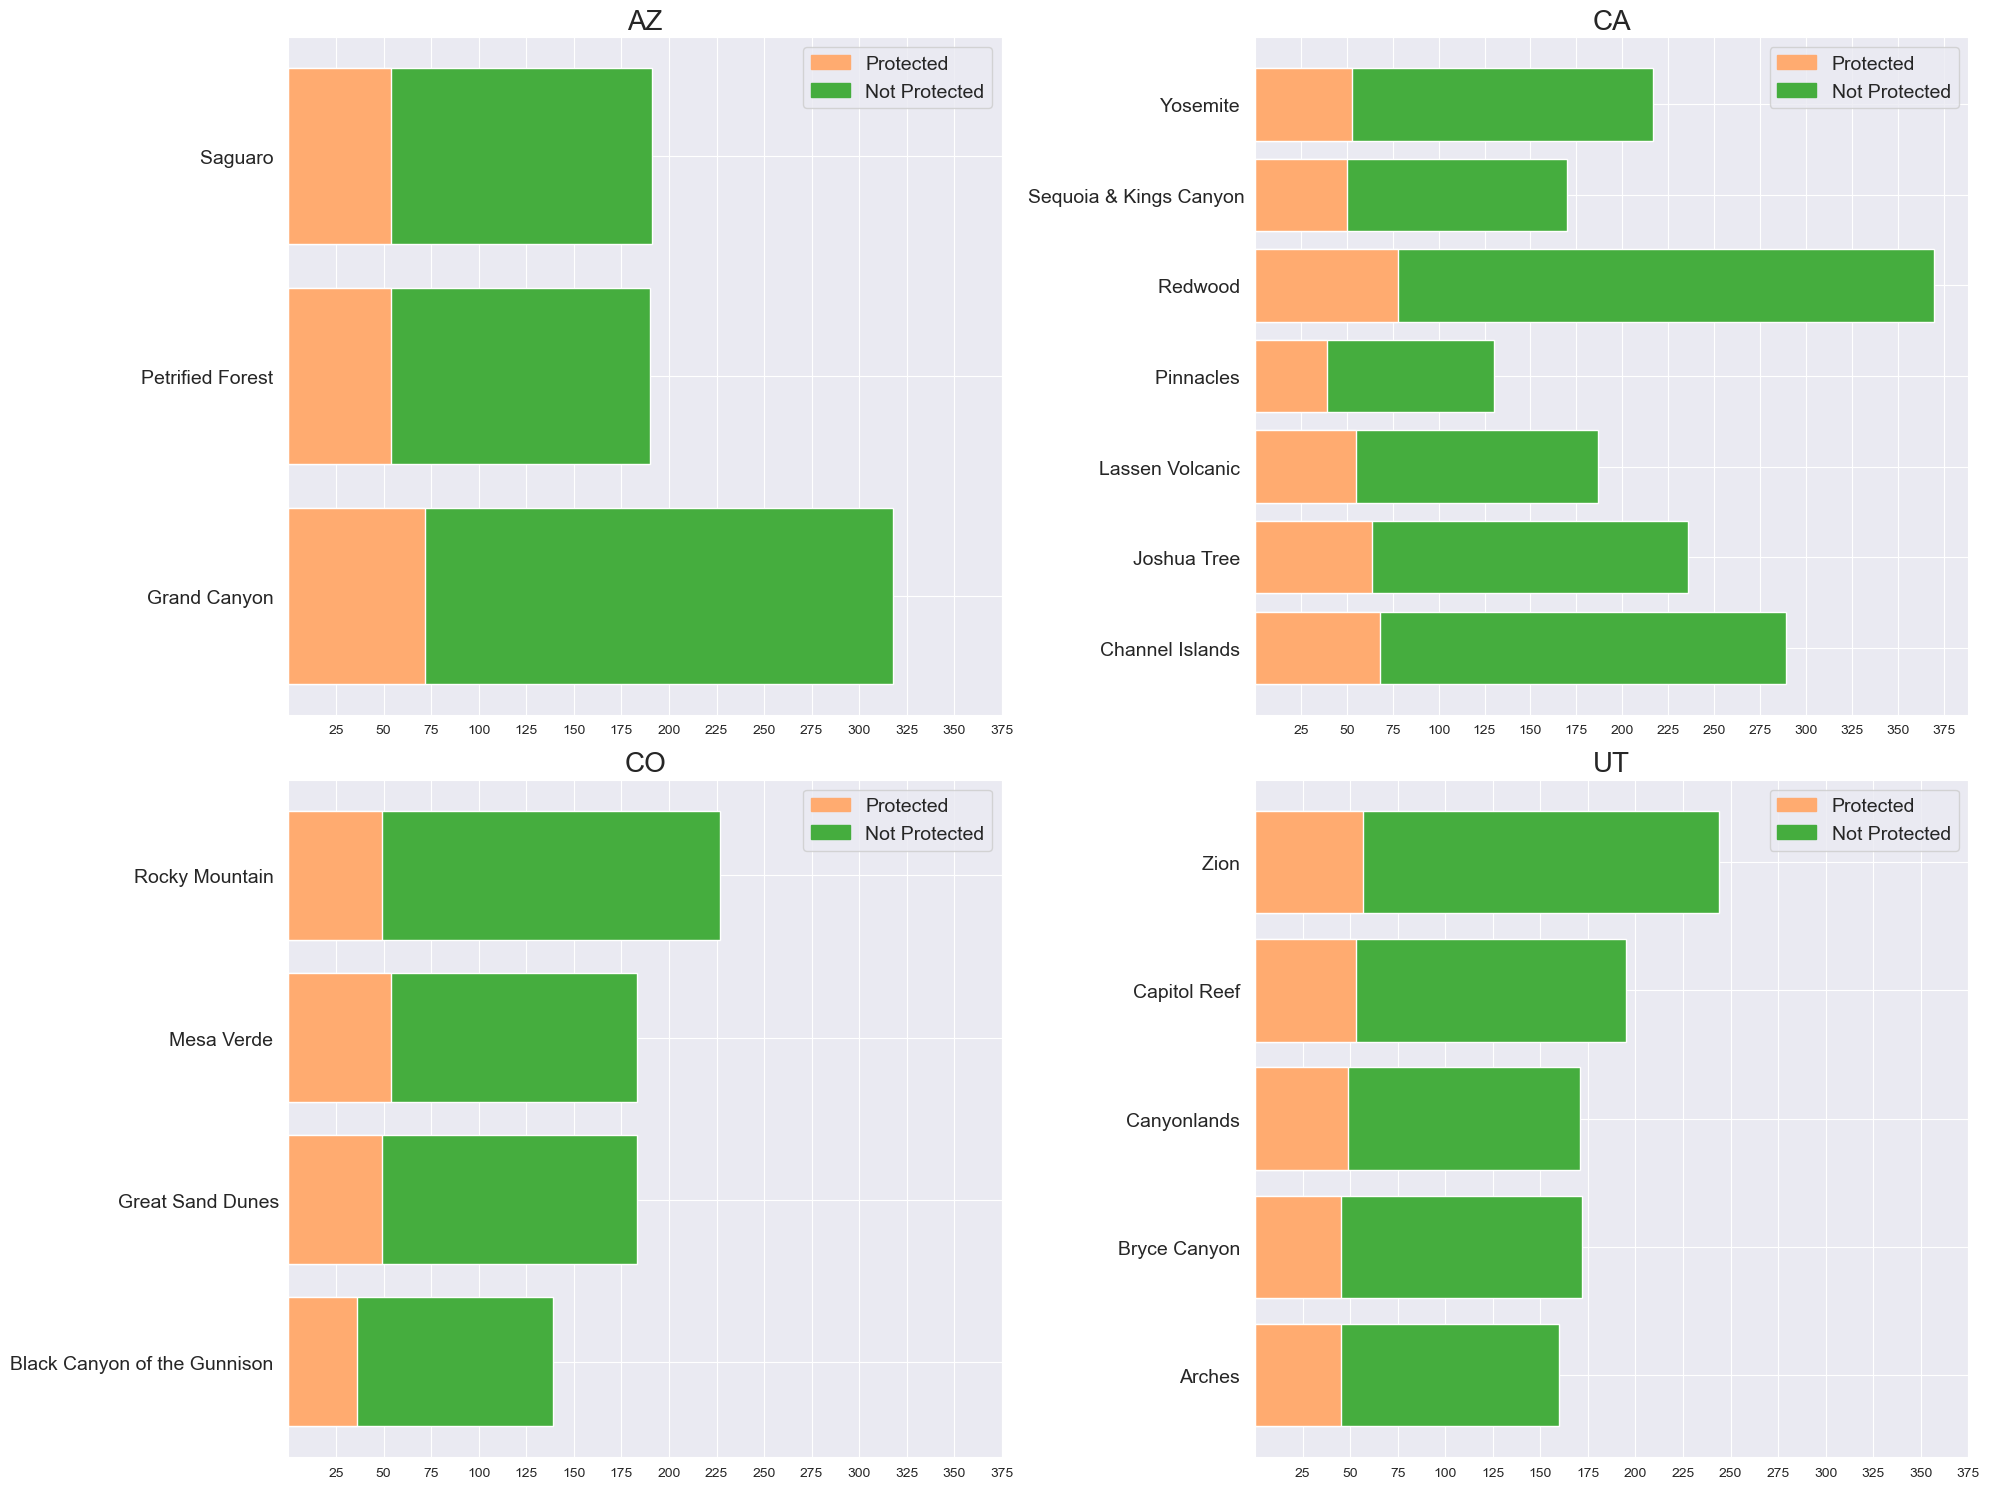

In [120]:
# Plotting only states with more than 2 National Parks.
# Defining a new states_list with above criteria
colours = {'Protected': '#FFAB70', 'Not Protected': '#45AD3E'}
handles = [mpatches.Patch(color=colour, label=label) for label, colour in colours.items()]
states_list_short = ['AZ', 'CA', 'CO', 'UT']
standard_width = 0.5

protected = {}
for state in states_list_short:
    protected[state] = pd.DataFrame(parks_pro_counts[parks_pro_counts['state'] == state])

plt.figure(figsize=(20,15))
for i, state in enumerate(states_list_short):
    data = protected[state]
    plt.subplot(2,2,(i+1))
    plt.title(state, fontsize=20)
    plt.barh(y=data.park_name, width=data.not_protected, color='#45AD3E')
    plt.barh(y=data.park_name, width=data.protected, color='#FFAB70')
    plt.yticks(rotation=0, fontsize=14)
    plt.xticks(np.arange(25,400,25))
    plt.legend(handles=handles, fontsize=14)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Create a new boolean column `is_raptor`
- Fill values 'NaN' with 'Not Raptor'

In [122]:
sw_birds_df['raptor'].fillna('Not Raptor', inplace=True)

In [123]:
sw_birds_df['is_raptor'] = sw_birds_df.raptor != 'Not Raptor'

In [124]:
parks_prey_counts = sw_birds_df.groupby(['state', 'park_name', 'is_raptor'])\
                    .common_names.nunique()\
                    .reset_index()\
                    .pivot(columns='is_raptor',
                            index=['state', 'park_name'],
                            values='common_names')\
                            .reset_index()
parks_prey_counts.columns = ['state', 'park_name', 'not_raptor', 'raptor']

percentage2 = round(parks_prey_counts.raptor / (parks_prey_counts.raptor + parks_prey_counts.not_raptor) * 100, 2)
parks_prey_counts['%age_raptor'] = percentage2

# Split 'park_name' in this dataframe to remove 'National Park'
parks_prey_counts['park_name'] = parks_prey_counts['park_name'].apply(lambda x: x[:-13] if x.endswith(" National Park") else x)
# lambda function doesn't apply to indices [8] or [11] so,
parks_prey_counts.at[8, 'park_name'] = 'Sequoia & Kings Canyon'
parks_prey_counts.at[11, 'park_name'] = 'Great Sand Dunes'

parks_prey_counts

,state,park_name,not_raptor,raptor,%age_raptor
0,AZ,Grand Canyon,349,33,8.64
1,AZ,Petrified Forest,222,22,9.02
2,AZ,Saguaro,210,34,13.93
3,CA,Channel Islands,335,22,6.16
4,CA,Joshua Tree,270,30,10.00
5,CA,Lassen Volcanic,211,30,12.45
6,CA,Pinnacles,143,26,15.38
7,CA,Redwood,409,33,7.47
8,CA,Sequoia & Kings Canyon,188,32,14.55
9,CA,Yosemite,240,30,11.11


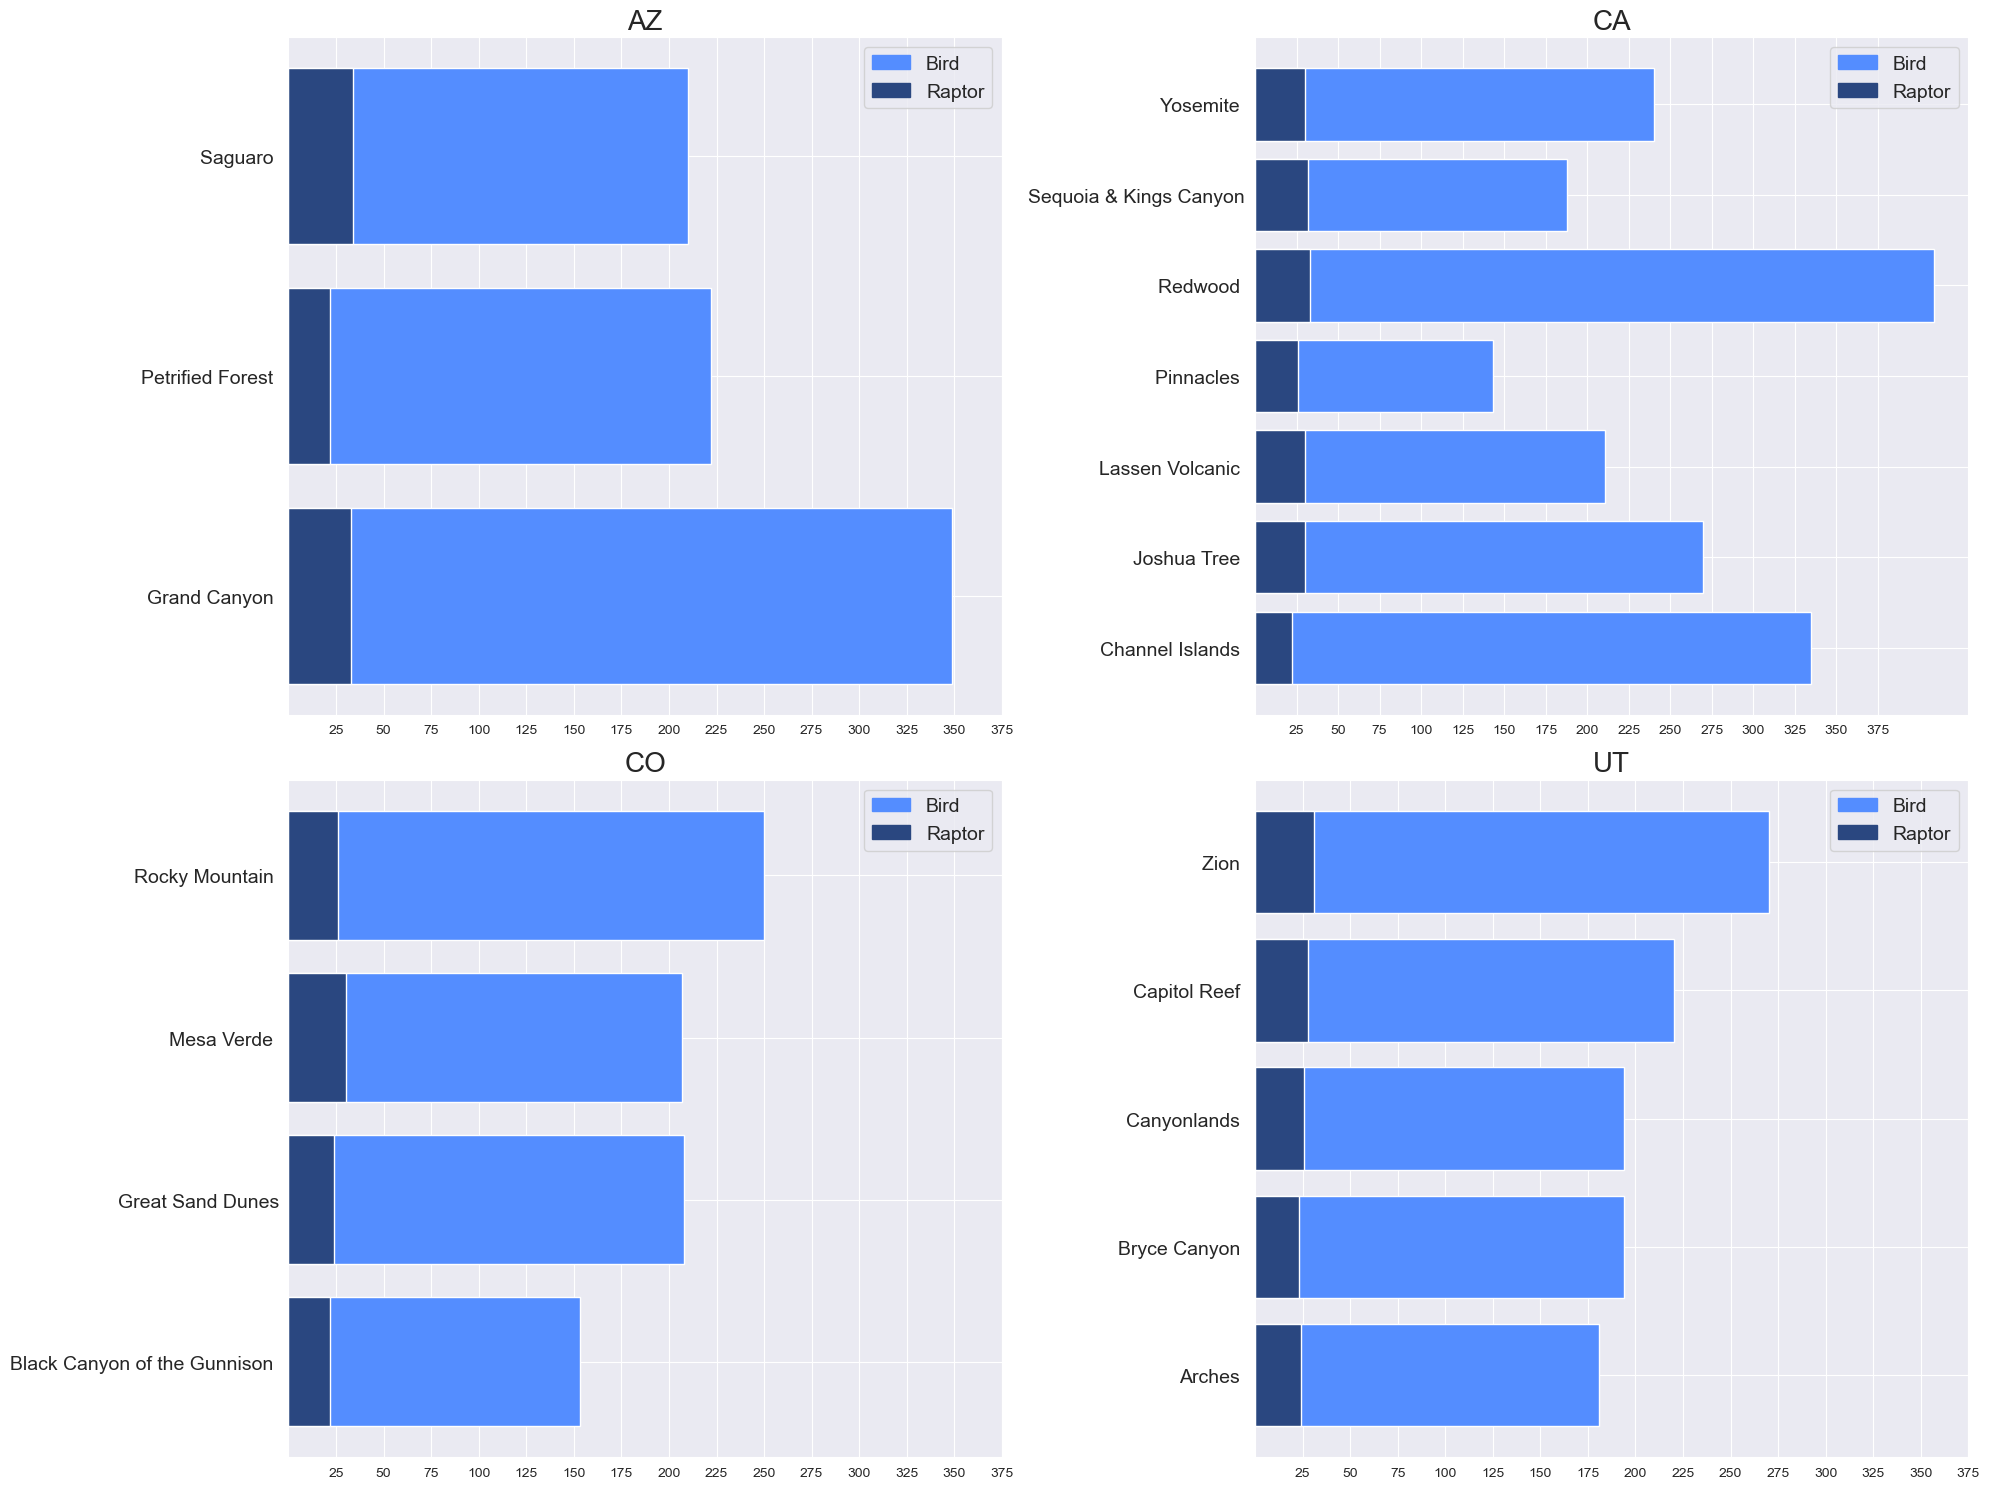

In [126]:
# Plotting only states with more than 2 National Parks.
# Defining a new states_list with above criteria
colours = {'Bird': '#548DFF', 'Raptor': '#2A4780'}
handles = [mpatches.Patch(color=colour, label=label) for label, colour in colours.items()]

raptor = {}
for state in states_list_short:
    raptor[state] = pd.DataFrame(parks_prey_counts[parks_prey_counts['state'] == state])

plt.figure(figsize=(20,15))
for i, state in enumerate(states_list_short):
    data = raptor[state]
    plt.subplot(2,2,(i+1))
    plt.title(state, fontsize=20)
    plt.barh(y=data.park_name, width=data.not_raptor, color='#548DFF')
    plt.barh(y=data.park_name, width=data.raptor, color='#2A4780')
    plt.yticks(rotation=0, fontsize=14)
    plt.xticks(np.arange(25,400,25))
    plt.legend(handles=handles, fontsize=14)
    plt.grid(True)

plt.tight_layout()
plt.show()